# Project -1 : Build Sequential NLP Classifier

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Refrences 
1) https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb/load_data
2) https://radimrehurek.com/gensim/models/keyedvectors.html

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Import data

In [3]:
 #Import data set, consider top 10,000 most frequently used words...
 #So we will have words with highest frequency to lowest frequncy....in this consider top 10,000 words

 (X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [4]:
X_train.shape

(25000,)

In [5]:
X_test.shape

(25000,)

In [6]:
#Will first merge train and test data to create complete set and then we can take train -test split as per our need
X= np.concatenate((X_train,X_test),axis=0)
Y = np.concatenate((y_train,y_test),axis=0)

# Data Analyses

In [7]:
print("Number of reviews", X.shape[0])
print("No of sentiments/labels", np.unique(Y))

Number of reviews 50000
No of sentiments/labels [0 1]


In [8]:
print("Average no of words per review...")
wordCountlst=[]
for i in X:
  wordCountlst.append(len(i))

print(np.mean(wordCountlst))

Average no of words per review...
234.75892


In [9]:
np.max(wordCountlst)

2494

Lets check distribution of word count in below range
- upto 300 
- 301 to 450
- 600 +

In [10]:
wordCountlst300=[]
wordCountlst450 =[]
wordCountlst450plus = []

for i in X :
  if len(i) <= 300 :
    wordCountlst300.append(len(i))
  elif len(i) >300 and len(i) <=450 :
    wordCountlst450.append(len(i))
  elif  len(i) > 450 :
    wordCountlst450plus.append(len(i))


In [11]:
import seaborn as sns

In [12]:
print("No of Reviews with word count <=300 ====>", len(wordCountlst300))
print("No of Reviews with word count >300 and <=450 ===>",len(wordCountlst450))
print("No of Reviews with word count >450 ===>",len(wordCountlst450plus))

No of Reviews with word count <=300 ====> 38583
No of Reviews with word count >300 and <=450 ===> 6261
No of Reviews with word count >450 ===> 5156


In [13]:
index =  tf.keras.datasets.imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [14]:
print("Total vocabulary count", len(index))

Total vocabulary count 88584


In [15]:
# Lets see which are tope frequency words....need some processing
index =  tf.keras.datasets.imdb.get_word_index()
temp = dict([(value, key) for (key, value) in index.items()]) 
reviewlst =[]

Decode Feature value to get original sentence

In [16]:
# Using word index from imdb, build orginal sentence in english for each row in X
for x in X[0:]:
  reviewlst.append(" ".join( [temp.get(i-3, "%") for i in x]))       #replace unknown word with %

In [17]:
len(reviewlst) # total reviews

50000

In [18]:
print("Review....",reviewlst[0])
print("Sentiment/Label...", Y[0])

Review.... % this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert % is an amazing actor and now the same being director % father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for % and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also % to the two little boy's that played the % of norman and paul they were just brilliant children are often left out of the % list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done do

In [19]:
print("Review....",reviewlst[1])
print("Sentiment/Label...", Y[1])

Review.... % big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal % the hair is big lots of boobs % men wear those cut % shirts that show off their % sickening that men actually wore them and the music is just % trash that plays over and over again in almost every scene there is trashy music boobs and % taking away bodies and the gym still doesn't close for % all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then
Sentiment/Label... 0


In [20]:
t = tf.keras.preprocessing.text.Tokenizer(num_words=10000)
t.fit_on_texts(reviewlst)

Below code shows most word frequency count after converting input data into actual sentenses using word index

In [21]:
df1 = pd.DataFrame.from_dict(t.word_counts,orient="index",columns=['WordCount'])

In [22]:
df1.sort_values('WordCount',ascending=False)

,WordCount
the,666757
and,324337
a,322800
of,289379
to,268079
...,...
paperhouse,32
baseketball,32
darkman,32
carlito,32


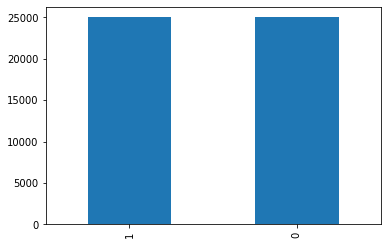

In [23]:
df2 =pd.DataFrame(Y,index=Y[:],columns=['Sentiment'])
df2['Sentiment'].value_counts().plot(kind='bar')

The data is balanced dataset w.r.t. positive (1) and negative (0) sentiments 

# Build Model

# Model-1 : Using glove embeddings

In [20]:
 # we have already downloaded data considering top 10,000 frequently used words
max_features = 10000             
# In the above section we have seen that no of reviews with word count <=540 is 38583+6261 =44844..which covers almost 90% of reviews
maxlen = 450                  
embedding_size = 50

Lets do padding

In [19]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [26]:
X_V1 = pad_sequences(X,maxlen=maxlen)

In [27]:
X.shape

(50000,)

In [28]:
X_V1.shape

(50000, 450)

The data is related to moview review...thus the words used are very common/generic for experessing postive and negative sentiment.

So lets go with pre built embedding models for word embedding...such as glove as it is built with vast public data source

In [26]:
# I am using file stored in my google drive
embeddingFile = '/content/drive/MyDrive/LablFiles/SequenceNLP_Internal/glove.6B.50d.txt'

In [27]:
embeddingdic = {}

for f in open(embeddingFile) :
  word = f.split(" ")[0]
  embededval = f.split(" ")[1:]
  embededval = np.asarray(embededval,dtype='float32')
  embeddingdic[word] =embededval

In [28]:
len(embeddingdic)

400000

Lets check words randomly

In [29]:
embeddingdic['this']

array([ 5.3074e-01,  4.0117e-01, -4.0785e-01,  1.5444e-01,  4.7782e-01,
        2.0754e-01, -2.6951e-01, -3.4023e-01, -1.0879e-01,  1.0563e-01,
       -1.0289e-01,  1.0849e-01, -4.9681e-01, -2.5128e-01,  8.4025e-01,
        3.8949e-01,  3.2284e-01, -2.2797e-01, -4.4342e-01, -3.1649e-01,
       -1.2406e-01, -2.8170e-01,  1.9467e-01,  5.5513e-02,  5.6705e-01,
       -1.7419e+00, -9.1145e-01,  2.7036e-01,  4.1927e-01,  2.0279e-02,
        4.0405e+00, -2.4943e-01, -2.0416e-01, -6.2762e-01, -5.4783e-02,
       -2.6883e-01,  1.8444e-01,  1.8204e-01, -2.3536e-01, -1.6155e-01,
       -2.7655e-01,  3.5506e-02, -3.8211e-01, -7.5134e-04, -2.4822e-01,
        2.8164e-01,  1.2819e-01,  2.8762e-01,  1.4440e-01,  2.3611e-01],
      dtype=float32)

In [30]:
embeddingdic['beautiful']

array([ 0.54623  ,  1.2042   , -1.1288   , -0.1325   ,  0.95529  ,
        0.040524 , -0.47863  , -0.3397   , -0.28056  ,  0.71761  ,
       -0.53691  , -0.0045698,  0.73217  ,  0.12101  ,  0.28093  ,
       -0.088097 ,  0.59733  ,  0.55264  ,  0.056646 , -0.50247  ,
       -0.63204  ,  1.1439   , -0.31053  ,  0.1263   ,  1.3155   ,
       -0.52444  , -1.5041   ,  1.158    ,  0.68795  , -0.85051  ,
        2.3236   , -0.41789  ,  0.44519  , -0.019216 ,  0.28969  ,
        0.53258  , -0.023008 ,  0.58958  , -0.72397  , -0.85216  ,
       -0.17761  ,  0.14432  ,  0.40658  , -0.52003  ,  0.09081  ,
        0.082961 , -0.021975 , -1.6214   ,  0.34579  , -0.010919 ],
      dtype=float32)

In [31]:
embeddingdic['bad']

array([-0.17981 , -0.40407 , -0.1653  , -0.60687 , -0.39656 ,  0.12688 ,
       -0.053049,  0.38024 , -0.51008 ,  0.46593 , -0.30818 ,  0.79362 ,
       -0.85766 , -0.25143 ,  1.0448  ,  0.18628 ,  0.13688 ,  0.092588,
       -0.2236  , -0.13604 , -0.19482 ,  0.057702,  0.56133 ,  0.24823 ,
        0.627   , -1.8437  , -1.2573  ,  0.64482 ,  1.2787  , -0.29522 ,
        3.0493  ,  0.62079 ,  0.90369 , -0.030099, -0.13091 ,  0.30525 ,
       -0.070138, -0.12912 ,  0.72277 , -0.79774 , -0.70277 ,  0.038009,
        0.27192 ,  0.35679 ,  0.26493 ,  0.13037 , -0.01369 ,  0.33713 ,
        0.99956 ,  0.72031 ], dtype=float32)

In [32]:
embeddingdic['very']

array([ 5.7049e-01, -7.7854e-03, -7.0766e-01, -3.1785e-01,  8.9493e-01,
       -1.6128e-02, -6.7149e-02,  1.5765e-01, -4.9832e-01,  2.5845e-01,
        1.0943e-01,  3.6728e-01, -1.4843e-01,  6.3286e-02,  2.0832e-01,
        4.5920e-01,  7.1781e-01,  2.2772e-01, -1.5349e-03, -9.3093e-01,
       -8.0048e-01,  4.6714e-01,  4.1571e-01,  1.7572e-01,  1.0876e+00,
       -1.6116e+00, -7.0943e-01,  8.3772e-01,  6.7081e-01,  1.8139e-01,
        3.9899e+00, -1.0270e-01,  4.3900e-01, -6.7926e-01,  1.1861e-01,
       -2.0182e-01, -8.1603e-02,  9.0739e-01, -5.2258e-01, -4.8426e-01,
       -3.1326e-01,  1.0325e-01,  1.3036e-01,  3.5115e-01,  3.7593e-01,
        6.4388e-02, -2.2590e-01,  7.9125e-02,  1.2573e-01,  8.3939e-01],
      dtype=float32)

Lets create weight matrix for words in the data set 

In [61]:
NoofWords = len(tf.keras.datasets.imdb.get_word_index()) +1
#NoofWords = len(t.word_index)+1
print(NoofWords)

88585


In [64]:
embedding_matrix = np.zeros((NoofWords,50))

In [65]:
for word, i in tf.keras.datasets.imdb.get_word_index().items() :
  embedding_vector = embeddingdic.get(word)
  if embedding_vector is not None :
    embedding_matrix[i]  =   embedding_vector

In [66]:
embedding_matrix.shape

(88585, 50)

In [69]:
embedding_matrix[1]

array([ 4.18000013e-01,  2.49679998e-01, -4.12420005e-01,  1.21699996e-01,
        3.45270008e-01, -4.44569997e-02, -4.96879995e-01, -1.78619996e-01,
       -6.60229998e-04, -6.56599998e-01,  2.78430015e-01, -1.47670001e-01,
       -5.56770027e-01,  1.46579996e-01, -9.50950012e-03,  1.16579998e-02,
        1.02040000e-01, -1.27920002e-01, -8.44299972e-01, -1.21809997e-01,
       -1.68009996e-02, -3.32789987e-01, -1.55200005e-01, -2.31309995e-01,
       -1.91809997e-01, -1.88230002e+00, -7.67459989e-01,  9.90509987e-02,
       -4.21249986e-01, -1.95260003e-01,  4.00710011e+00, -1.85939997e-01,
       -5.22870004e-01, -3.16810012e-01,  5.92130003e-04,  7.44489999e-03,
        1.77780002e-01, -1.58969998e-01,  1.20409997e-02, -5.42230010e-02,
       -2.98709989e-01, -1.57490000e-01, -3.47579986e-01, -4.56370004e-02,
       -4.42510009e-01,  1.87849998e-01,  2.78489990e-03, -1.84110001e-01,
       -1.15139998e-01, -7.85809994e-01])

Split the data into train, test sets

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X_V1,Y,test_size=0.2,random_state=65,stratify=Y)

In [67]:
x_train.shape

(40000, 450)

In [68]:
x_test.shape

(10000, 450)

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout, Flatten, BatchNormalization

In [51]:
model = Sequential()

In [52]:
model.add(Embedding(NoofWords,embedding_size,weights=[embedding_matrix], input_length=maxlen))
model.add(LSTM(256,return_sequences=True))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(1,activation='softmax'))

In [53]:
model.compile(optimizer='adam',metrics=['accuracy'], loss='categorical_crossentropy')

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 450, 50)           4429250   
_________________________________________________________________
lstm (LSTM)                  (None, 450, 256)          314368    
_________________________________________________________________
flatten (Flatten)            (None, 115200)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               29491456  
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [56]:
batchsize = 512
epochs = 4

In [57]:
history = model.fit(x_train, y_train, batch_size=batchsize, epochs= epochs,validation_data=(x_test, y_test))

Epoch 1/8
79/79 [==============================] - 1029s 13s/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 2/8
79/79 [==============================] - 1018s 13s/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 3/8
79/79 [==============================] - 1010s 13s/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 4/8
79/79 [==============================] - 1008s 13s/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 5/8
79/79 [==============================] - 1041s 13s/step - loss: 0.0000e+00 - accuracy: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 6/8
56/79 [====================>.........] - ETA: 4:37 - loss: 0.0000e+00 - accuracy: 0.5009

KeyboardInterrupt: ignored

# Model-1 : Conclusion 

Tried different values of epochs, batch size but the accuracy and validation accuracy is not going beyond 50%

# Model-2 : Using gensim library, Word2Vec embedding

In [24]:
import gensim
import gensim.downloader as api

Load already trained gensim embedding

In [25]:
import os
from os import path

In [33]:
modelPath ='/content/drive/MyDrive/LablFiles/SequenceNLP_Internal/word2vec-google-news-300.gz'

In [44]:
cd '/content/drive/MyDrive/LablFiles/SequenceNLP_Internal/'

/content/drive/MyDrive/LablFiles/SequenceNLP_Internal


In [26]:
word2vec = gensim.downloader.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


Store doanloaded file in some folder in google drive so that next time 
we can load model directly from file instead of downloading

In [27]:
# Code is commented after copying file to some permanant folder
#!cp '/root/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz' '/content/drive/MyDrive/LablFiles/SequenceNLP_Internal/'

In [32]:
word2vec

In [34]:
embedding_size = word2vec.wv.syn0.shape[1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


In [35]:
embedding_size

300

In [38]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [39]:
 # we have already downloaded data considering top 10,000 frequently used words
max_features = 10000             
# In the above section we have seen that no of reviews with word count <=300 is 38583
# So lets consider 300 words
maxlen = 300 
X_V1 = pad_sequences(X,maxlen=maxlen)    
x_train, x_test, y_train, y_test = train_test_split(X_V1,Y,test_size=0.2,random_state=78,stratify=Y)      

In [40]:
embedding_matrix = np.zeros((max_features + 1, embedding_size))

In [41]:
for word, i in sorted(t.word_index.items(),key=lambda x:x[1]):
    if i > max_features:
        break
    #if word in word2vec.key_to_index :
    if word in word2vec.wv.vocab :
        embedding_vector = word2vec.wv[word]
        embedding_matrix[i] = embedding_vector

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [42]:
embedding_matrix.shape

(10001, 300)

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout, Flatten, BatchNormalization

model2 = Sequential()

In [47]:
model2.add(Embedding(max_features+1,embedding_size,weights=[embedding_matrix], input_length=maxlen,trainable=False))
model2.add(LSTM(128,return_sequences=True))
model2.add(Dropout(0.15))
model2.add(Dense(64,activation='tanh'))
model2.add(Dense(1,activation='sigmoid'))

In [48]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 300)          3000300   
_________________________________________________________________
lstm_1 (LSTM)                (None, 300, 128)          219648    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300, 128)          0         
_________________________________________________________________
dense_2 (Dense)              (None, 300, 64)           8256      
_________________________________________________________________
dense_3 (Dense)              (None, 300, 1)            65        
Total params: 3,228,269
Trainable params: 227,969
Non-trainable params: 3,000,300
_________________________________________________________________


In [49]:
model2.compile(optimizer='adam',metrics=['accuracy'], loss='binary_crossentropy')

In [51]:
batchsize = 128
epochs = 5

In [52]:
history2 = model2.fit(x_train, y_train, batch_size=batchsize, epochs= epochs,validation_data=(x_test, y_test))

Epoch 1/5
313/313 [==============================] - 463s 1s/step - loss: 0.6866 - accuracy: 0.5353 - val_loss: 0.6906 - val_accuracy: 0.5146
Epoch 2/5
313/313 [==============================] - 456s 1s/step - loss: 0.6756 - accuracy: 0.5656 - val_loss: 0.6752 - val_accuracy: 0.5606
Epoch 3/5
313/313 [==============================] - 470s 2s/step - loss: 0.6595 - accuracy: 0.5888 - val_loss: 0.6511 - val_accuracy: 0.5911
Epoch 4/5
313/313 [==============================] - 479s 2s/step - loss: 0.6375 - accuracy: 0.6090 - val_loss: 0.6236 - val_accuracy: 0.6238
Epoch 5/5
313/313 [==============================] - 475s 2s/step - loss: 0.6193 - accuracy: 0.6223 - val_loss: 0.6226 - val_accuracy: 0.6173


In [53]:
# save the model to disk
model2.save('/content/drive/MyDrive/LablFiles/SequenceNLP_Internal/Project1_model2.h5')

#from keras.models import load_model
#loaded_model = load_model('/content/drive/MyDrive/LablFiles/SequenceNLP_Internal/Project1_model2.h5')

In [89]:
from sklearn.metrics import confusion_matrix

In [92]:
from keras.models import load_model
model2_1 = load_model('/content/drive/MyDrive/LablFiles/SequenceNLP_Internal/Project1_model2.h5')

In [93]:
result = model2_1.evaluate(x_test,y_test)

313/313 [==============================] - 76s 188ms/step - loss: 0.6226 - accuracy: 0.6173


In [94]:
print("Test Loss and Accuracy",result)

Test Loss and Accuracy [0.6225565671920776, 0.6173170208930969]


In [95]:
print("Average accuracy",np.mean(history2.history["accuracy"]))

Average accuracy 0.5841941833496094


Lets do prection on some random samples from the data set

In [96]:
pred = model2_1.predict(X_V1[0:1])

In [97]:
y_pred = (pred >= 0.5) * 1

In [100]:
dfres = pd.DataFrame({"sentiment": y_pred.flatten()})

In [102]:
dfres['sentiment'].value_counts()

1    276
0     24
Name: sentiment, dtype: int64

In [103]:
Y[0]

1

In [104]:
pred = model2_1.predict(X_V1[2:3])

In [105]:
y_pred = (pred >= 0.5) * 1

In [106]:
dfres = pd.DataFrame({"sentiment": y_pred.flatten()})

In [107]:
dfres['sentiment'].value_counts()

1    165
0    135
Name: sentiment, dtype: int64

In [110]:
Y[2]

0

Lets do some prediciton on the "reviewlst" which was created in above section

In [116]:
print("Review....",reviewlst[0])
print("Sentiment/Label...", Y[0])

Review.... % this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert % is an amazing actor and now the same being director % father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for % and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also % to the two little boy's that played the % of norman and paul they were just brilliant children are often left out of the % list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done do

In [115]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [117]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(reviewlst)

In [118]:
words_to_index = tokenizer.word_index

In [119]:
x_new_train = tokenizer.texts_to_sequences(reviewlst)

In [120]:
x_new_train = pad_sequences(x_new_train, maxlen=300)

In [131]:
preds = model2_1.predict(x_new_train[0:50])

In [138]:
n = np.random.randint(0,50)

print(reviewlst[n])

if preds[n].any() > 0.5:
  print('predicted sentiment : positive')
else: 
  print('precicted sentiment : negative')

if (Y[n] == 1):
  print('correct sentiment : positive')
else:
  print('correct sentiment : negative')

% when philo vance edmund lowe is standing % on the edge of a balcony high above the city apparently % and just about to step to his death it immediately reminded me of a nearly identical scene in another film made nine years later the woman in green in which sherlock holmes basil % is similarly about to % himself into space while being % br br happily both philo vance and sherlock holmes survive these attempts at murder by % criminals exciting cinematic suspense in both these scenes when will they learn you can't cloud the minds of great fictional detectives
predicted sentiment : positive
correct sentiment : positive


In [139]:
n = np.random.randint(0,50)

print(reviewlst[n])

if preds[n].any() > 0.5:
  print('predicted sentiment : positive')
else: 
  print('precicted sentiment : negative')

if (Y[n] == 1):
  print('correct sentiment : positive')
else:
  print('correct sentiment : negative')

% b movie at best sound effects are pretty good lame concept decent execution i suppose it's a rental br br you put some % oil in your mouth to save you from de poison % you cut de bite and suck out de % you gonna be ok tommy br br you stay by the % when agent harris calls you get me give me a fire % br br weapons we need weapons where's the % all we have is this % br br dr price is the snake expert br br local % can handle the occasional % alert every er in the % city area
predicted sentiment : positive
correct sentiment : negative


In [140]:
n = np.random.randint(0,50)

print(reviewlst[n])

if preds[n].any() > 0.5:
  print('predicted sentiment : positive')
else: 
  print('precicted sentiment : negative')

if (Y[n] == 1):
  print('correct sentiment : positive')
else:
  print('correct sentiment : negative')

% i have only had the luxury of seeing this movie once when i was rather young so much of the movie is % in trying to remember it however i can say it was not as funny as a movie called killer tomatoes should have been and the most memorable things from this movie are the song and the scene with the elderly couple talking about poor timmy other than that the movie is really just scenes of little tomatoes and big tomatoes rolling around and people acting scared and overacting as people should do in a movie of this type however just having a very silly premise and a catchy theme song do not a good comedy make granted this movie is supposed to be a b movie nothing to be taken seriously however you should still make jokes that are funny and not try to % a mildly amusing premise into a full % movie perhaps a short would have been fine as the trailer showing the elderly couple mentioned above and a man desperately trying to gun down a larger % was actually pretty good the trailer itself look

In [145]:
n = np.random.randint(0,50)

print(reviewlst[n])

if preds[n].any() > 0.5:
  print('predicted sentiment : positive')
else: 
  print('precicted sentiment : negative')

if (Y[n] == 1):
  print('correct sentiment : positive')
else:
  print('correct sentiment : negative')

% bela lugosi appeared in several of these low budget % for % studios in the 1940's and the corpse % is one of the better ones br br bela plays a mad scientist who kidnaps young brides and kills them and then % fluid from their bodies so he can keep his % wife looking young after a reporter and a doctor stay the night at his home and discover he is responsible for the % deaths the following morning they report these murders to the police and the mad scientist is shot and drops dead shortly afterwards br br you have got almost everything in this movie the % % consist of an old % a % and dwarf her sons a % and spooky % in % house bela and his wife find they sleep better in % rather than % in the movie br br the corpse % is worth a look especially for bela lugosi fans great fun br br rating 3 stars out of 5
predicted sentiment : positive
correct sentiment : positive


In [146]:
n = np.random.randint(0,50)

print(reviewlst[n])

if preds[n].any() > 0.5:
  print('predicted sentiment : positive')
else: 
  print('precicted sentiment : negative')

if (Y[n] == 1):
  print('correct sentiment : positive')
else:
  print('correct sentiment : negative')

% this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert % is an amazing actor and now the same being director % father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for % and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also % to the two little boy's that played the % of norman and paul they were just brilliant children are often left out of the % list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi